create_response_graph


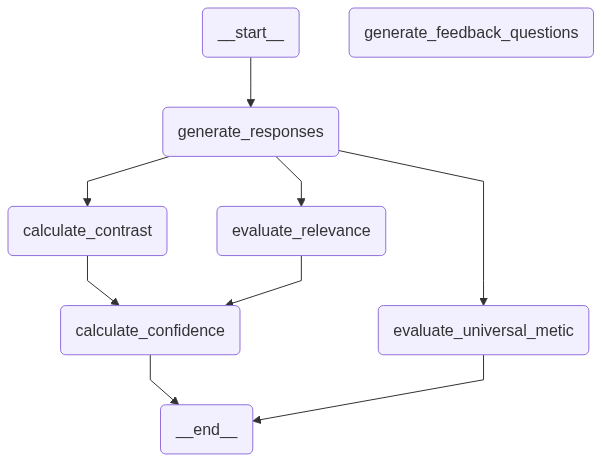

In [1]:
from agent import create_response_graph

graph = create_response_graph(None)
graph

In [2]:
from pprint import pprint

result = await graph.ainvoke({
	"messages": [
		("human", "What is the capital of France?")
	],
	"responses": []
})

pprint(result)


generate_responses
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
evaluate_relevance
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
calculate_confidence
Confidence: 1.0
generate_feedback_questions
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
g

In [3]:
result = await graph.ainvoke({
	"messages": [
		("human", "where is the location of 2025 **AI Engineer World's Fair Agents Hackathon** in SF?")
	],
	"responses": []
})


pprint(result)


generate_responses
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
evaluate_relevance
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
calculate_confidence
Confidence: 0.65
generate_feedback_questions
httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [7]:
result["relevance_scores"]

[1.0, 0.0, 0.6]

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [30]:
from langchain_mongodb import MongoDBAtlasVectorSearch
from langchain_openai import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(model="text-embedding-ada-002", disallowed_special=())

# Instantiate the vector store
vector_store = MongoDBAtlasVectorSearch.from_connection_string(
   connection_string = os.environ.get("MONGODB_URI"),
   namespace = "sample_mflix.embedded_movies",
   embedding = embedding_model,
   text_key = "plot",
   embedding_key = "plot_embedding",
   relevance_score_fn = "dotProduct"
)

In [32]:
from langchain.agents import tool

# Define a vector search tool
@tool
def vector_search(user_query: str) -> str:
    """
    Retrieve information using vector search to answer a user query.
    """
    
    retriever = vector_store.as_retriever(
       search_type = "similarity",
       search_kwargs = { "k": 10 } # Retrieve top 5 most similar documents
    )

    results = retriever.invoke(user_query)
   
    # Concatenate the results into a string
    context = "\n\n".join([f"{doc.metadata['title']}: {doc.page_content}" for doc in results])
    return context

# Test the tool
test_results = vector_search.invoke("wealthy uncle")
print(test_results)

httpx                  INFO:    HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"



In [24]:
test_results

''

In [5]:
import datetime   # This will be needed later
import os

from dotenv import load_dotenv
from pymongo import MongoClient

# Load config from a .env file:
load_dotenv()
MONGODB_URI = os.environ['MONGODB_URI']

# Connect to your MongoDB cluster:
client = MongoClient(MONGODB_URI)

# List all the databases in the cluster:
for db_info in client.list_database_names():
   print(db_info)

sample_mflix
admin
local


In [9]:
# Get a reference to the 'sample_mflix' database:
db = client['sample_mflix']

# List all the collections in 'sample_mflix':
collections = db.list_collection_names()
for collection in collections:
   print(collection)

movies
embedded_movies
sessions
comments
theaters
users


In [29]:
embedded_movies = db["embedded_movies"]

next(embedded_movies.find())

{'_id': ObjectId('573a1390f29313caabcd5293'),
 'plot': "Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle's secretary has been named as her guardian until she marries, at which time she will officially take ...",
 'genres': ['Action'],
 'runtime': 199,
 'cast': ['Pearl White', 'Crane Wilbur', 'Paul Panzer', 'Edward Josè'],
 'num_mflix_comments': 0,
 'poster': 'https://m.media-amazon.com/images/M/MV5BMzgxODk1Mzk2Ml5BMl5BanBnXkFtZTgwMDg0NzkwMjE@._V1_SY1000_SX677_AL_.jpg',
 'title': 'The Perils of Pauline',
 'fullplot': 'Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle\'s secretary has been named as her guardian until she marries, at which time she will officially take possession of her inheritance. Meanwhile, her "guardian" and his confederates constantly come up with schemes to get rid of Pauline so that he can get his hands on the money himself.',
 'languages': ['English'],
 'released': datetime.datetime(1914, 3, 23

In [10]:
# Import the `pprint` function to print nested data:
from pprint import pprint

# Get a reference to the 'movies' collection:
movies = db['movies']

# Get the document with the title 'Blacksmith Scene':
pprint(movies.find_one({'title': 'Blacksmith Scene'}))

None


In [20]:
next(movies.find())

{'_id': ObjectId('573a1390f29313caabcd42e8'),
 'plot': 'A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.',
 'genres': ['Short', 'Western'],
 'runtime': 11,
 'cast': ['A.C. Abadie',
  "Gilbert M. 'Broncho Billy' Anderson",
  'George Barnes',
  'Justus D. Barnes'],
 'poster': 'https://m.media-amazon.com/images/M/MV5BMTU3NjE5NzYtYTYyNS00MDVmLWIwYjgtMmYwYWIxZDYyNzU2XkEyXkFqcGdeQXVyNzQzNzQxNzI@._V1_SY1000_SX677_AL_.jpg',
 'title': 'The Great Train Robbery',
 'fullplot': "Among the earliest existing films in American cinema - notable as the first film that presented a narrative story to tell - it depicts a group of cowboy outlaws who hold up a train and rob the passengers. They are then pursued by a Sheriff's posse. Several scenes have color included - all hand tinted.",
 'languages': ['English'],
 'released': datetime.datetime(1903, 12, 1, 0, 0),
 'directors': ['Edwin S. Porter'],
 'rated': 'TV-G',
 'awards': {'wins': 1, 'nominations': 0, 

In [15]:
from langgraph.checkpoint.mongodb import MongoDBSaver

# Initialize a MongoDB checkpointer
checkpointer = MongoDBSaver(client)

# Instantiate the graph with the checkpointer
graph = create_response_graph(checkpointer)

config = {"configurable": {"thread_id": 1}}

result = await graph.ainvoke({
	"messages": [
		("human", "where is the location of 2025 **AI Engineer World's Fair Agents Hackathon** in SF?")
	],
	"responses": []
}, config
)


pprint(result)

NotImplementedError: 